In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

Here is the 3D model I built by playing around in the google sheet, "Fair Weather Index". Generally the shape is pretty good, except that I have shifted the whole curve up. So even very windy days with ideal temperatures (wind gusts of 50mph) are scoring around 0.4. I'd rather that be 0. 

<IPython.core.display.Javascript object>


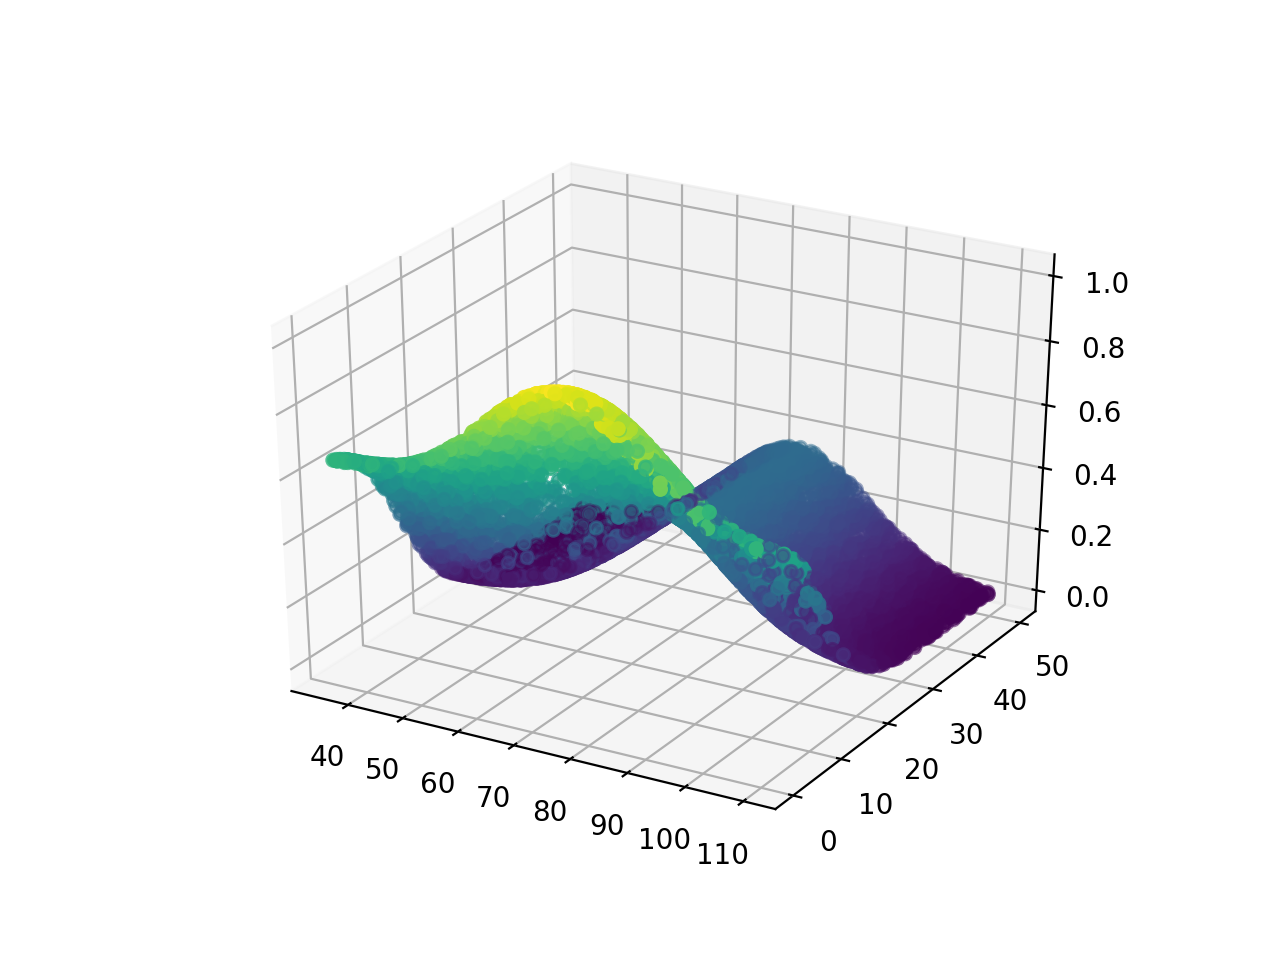

In [43]:
test = pd.DataFrame()

test['temp']=np.random.uniform(low=35,high = 110,size=10000)
test['wind']=np.random.uniform(low=0,high=50,size=10000)
test['tempScore']=np.exp(-((test['temp']-75)**2)/18**2)
test['windScore'] = 1/(0.97+np.exp(0.25*test['wind']-3.25))
test['score'] = (test['tempScore']*0.35)+(test['windScore']*0.65)


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(test['temp'],test['wind'],test['score'],c=test['score'],cmap='viridis')


I'm taking an approach where I create gaussian curves for each variable, then multiple them together. Came from this post. 
https://math.stackexchange.com/questions/1190183/algorithm-to-generate-a-hill

### Temperature

I like this shape, where 60 and 80 degrees both score 0.8.

<IPython.core.display.Javascript object>


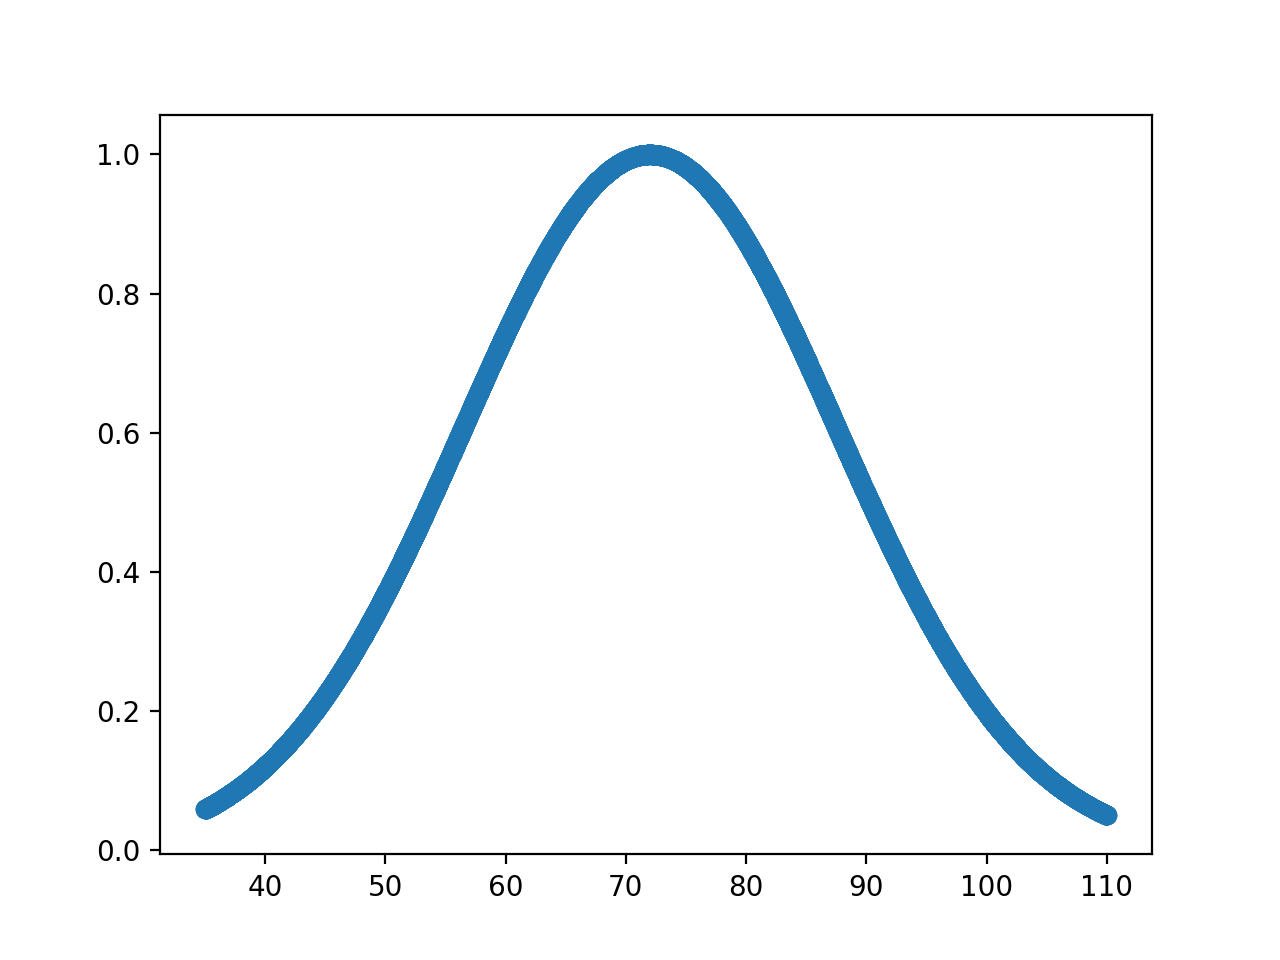

In [44]:
a = 1
b = 72
c = 11

fig = plt.figure()
ax = plt.axes()

test['tempG'] = a*np.exp(-((test['temp']-b)**2)/(2*c)**2)

plt.scatter(test['temp'],test['tempG'])

### Wind

5mph gets a 0.8.

<IPython.core.display.Javascript object>


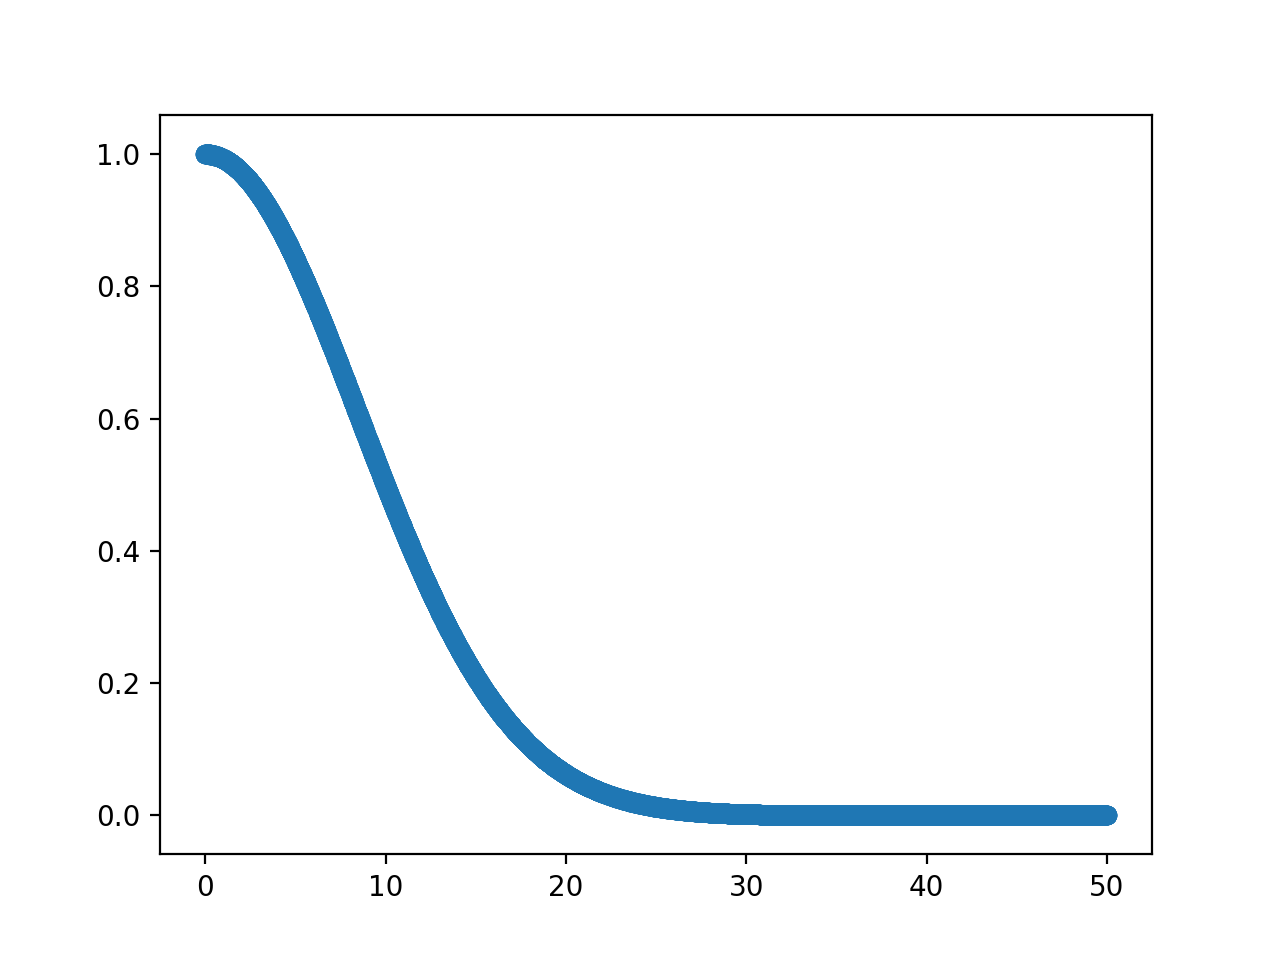

In [45]:
a = 1
b = 0
c = 6

fig = plt.figure()
ax = plt.axes()

test['windG'] = a*np.exp(-((test['wind']-b)**2)/(2*c)**2)

plt.scatter(test['wind'],test['windG'])

In [46]:
test['scoreG'] = test['tempG']*test['windG']

OMG it worked!

<IPython.core.display.Javascript object>


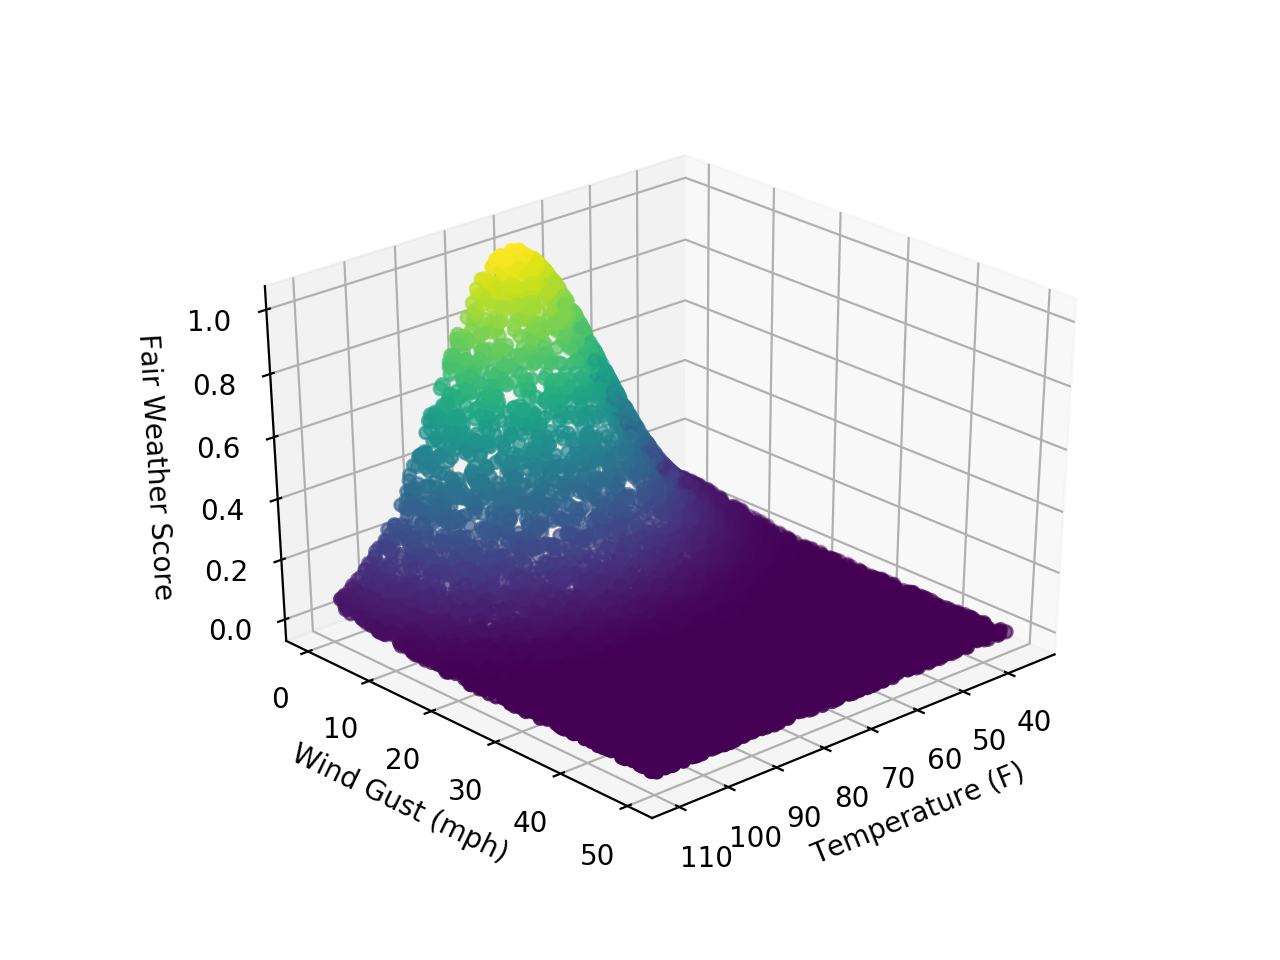

In [47]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Wind Gust (mph)')
ax.set_zlabel('Fair Weather Score')

ax.scatter3D(test['temp'],test['wind'],test['scoreG'],c=test['scoreG'],cmap='viridis')


Now I'm going to try and keep throwing variables at it and see if it still works.

<IPython.core.display.Javascript object>


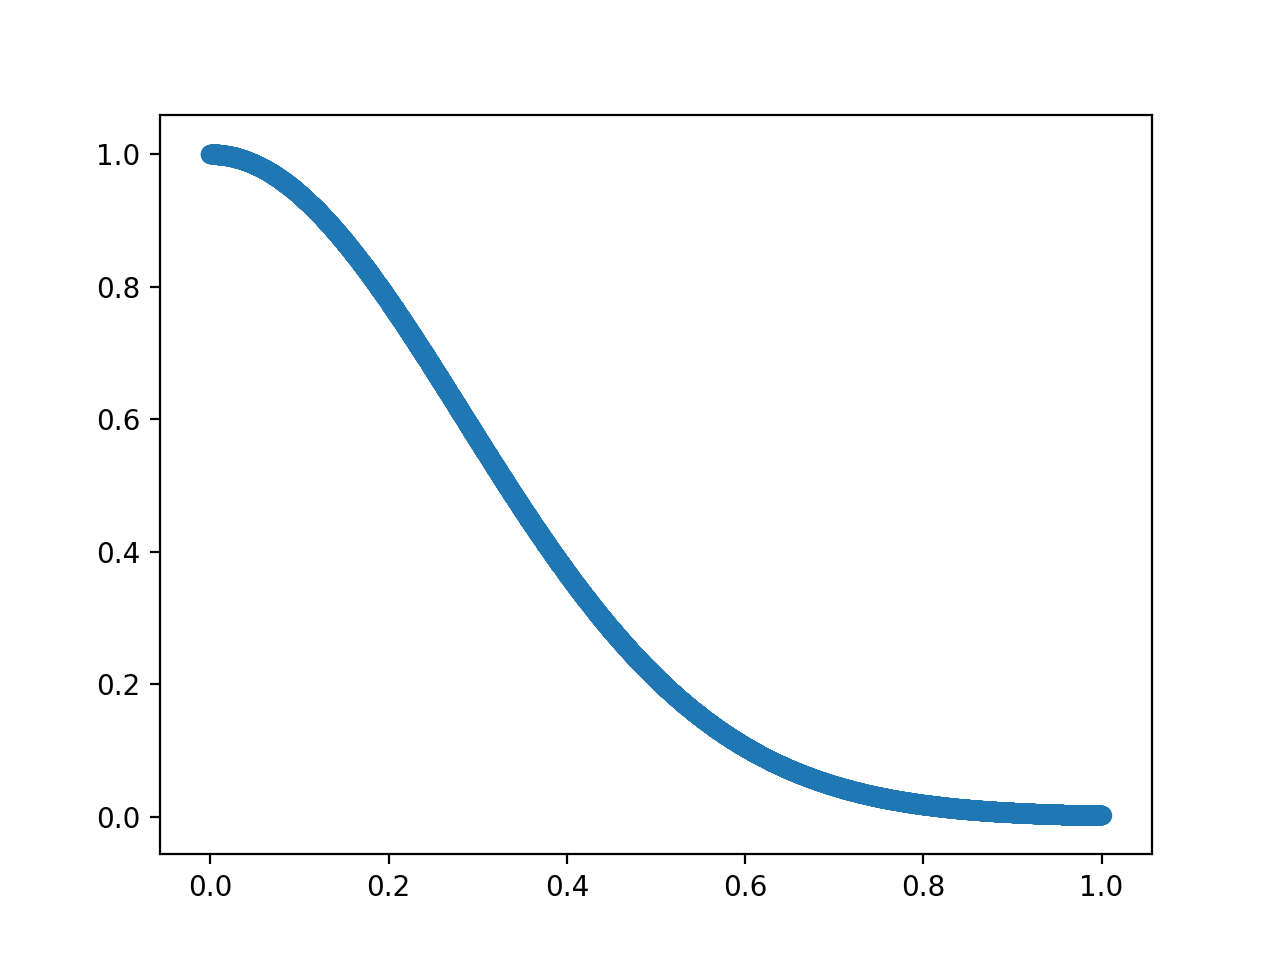

In [52]:
a = 1
b = 0
c = .2

fig = plt.figure()
ax = plt.axes()

test['precip'] = np.random.uniform(low=0,high=1,size=10000)

test['precipG'] = a*np.exp(-((test['precip']-b)**2)/(2*c)**2)

plt.scatter(test['precip'],test['precipG'])

In [61]:
test['score'] = test['precipG']*test['windG']*test['tempG']

test[test['score']>0.9]

,temp,wind,tempScore,windScore,score,tempG,windG,scoreG,precip,precipG
1620,74.141014,2.425620,0.997725,0.960518,0.950300,0.990574,0.959965,0.950916,0.010185,0.999352
2043,74.905331,3.248951,0.999972,0.945755,0.913231,0.982711,0.929319,0.913252,0.001932,0.999977
3524,66.550726,0.261204,0.802246,0.988738,0.911675,0.940492,0.999526,0.940046,0.070024,0.969819
4707,71.115550,0.898998,0.954497,0.981792,0.924486,0.998385,0.994403,0.992797,0.106800,0.931193
7148,76.717697,2.652775,0.990935,0.956700,0.908505,0.955056,0.952305,0.909505,0.013271,0.998900
7345,73.994858,1.806792,0.996887,0.970014,0.924644,0.991812,0.977585,0.969580,0.087136,0.953654
